In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
from os import path
import pandas as pd
import numpy as np
import sys

sys.path.append(path.abspath('/home/roboticslab/Robotology/Repos/allostractor/git'))
from attractor import Attractor

## Dummy input

In [2]:
episodes = 35000
sec_aV = 0

sec_aV_list = []
sec_bonus = True

discount = 0.000133333333333

for i in range(episodes):
    if sec_aV < 1 and sec_bonus == True and i < 30000:
        sec_aV += discount
        sec_aV_list.append(sec_aV)
        
    elif sec_aV > 0 and sec_bonus == False and i < 30000:
        sec_aV -= discount
        sec_aV_list.append(sec_aV)
    elif i >15000 and i < 30000:
        sec_aV = 0
        sec_aV_list.append(sec_aV)
    elif i >= 30000:
        sec_aV += 0.0002
        sec_aV_list.append(sec_aV)
    else:
        sec_bonus = False
        
print('Dummy security input created')

Dummy security input created


In [3]:
episodes = 35000
aro_aV = 0

aro_aV_list = []
aro_bonus = True

discount = 0.000133333333333

for i in range(episodes):
    if i < 15000:
        aro_aV = 0
        aro_aV_list.append(aro_aV)
    elif i >= 15000 and aro_aV < 1 and aro_bonus == True and i <= 30000:
        
        aro_aV +=discount
        aro_aV_list.append(aro_aV)
    elif aro_aV > 0 and aro_bonus == False  and i <= 30000:
        aro_aV -=discount
        aro_aV_list.append(aro_aV)
    elif i >= 30000:
        aro_aV += 0.0002
        aro_aV_list.append(aro_aV)
    else:
        aro_bonus = False

print('Dummy arousal input created')

Dummy arousal input created


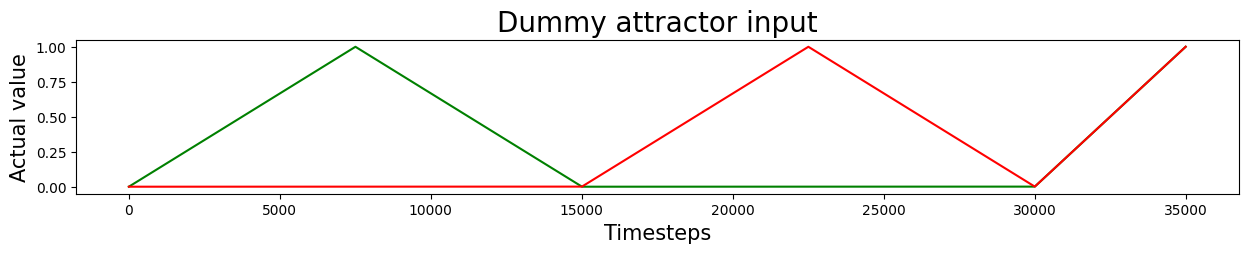

In [4]:
plt.figure(figsize=(15, 2))
plt.plot(sec_aV_list,'g')
plt.plot(aro_aV_list,'r')
plt.title('Dummy attractor input', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

## Attractor dynamics

In [5]:
q_cond = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
var_cond = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
dataset =[]
out_aro_list = []
out_sec_list = []


class agent():
    def __init__(self):
        self.attractor = Attractor()
        self.sec_aV = sec_aV_list
        self.aro_aV = aro_aV_list
        self.attractor.var = 30
        
    def attractor_dynamics(self,index):
        global out_aro_list, out_sec_list

        out_sec, out_aro = self.attractor.advance(self.sec_aV[index]*60, self.aro_aV[index]*60)
        out_aro_list.append(out_aro)
        out_sec_list.append(out_sec)
        
    def run(self):
        global out_aro_list, out_sec_list
        for i in range(len(q_cond)):
            self.attractor.q = q_cond[i]
            
            for j in range(len(var_cond)):
                self.attractor.var = var_cond[j]
                print("CONDITION Q = " + str(q_cond[i]))
                print("CONDITION VAR = " + str(var_cond[j]))
                
                for k in range(10):
                    out_aro_list=[]
                    out_sec_list=[]
                    print("Episode = " + str(k))
                    for n in range(len(aro_aV_list)):
                        self.attractor_dynamics(n)
                        
                    dataset.append([q_cond[i] , var_cond[j], k, "Arousal", aro_aV_list, out_aro_list])
                    dataset.append([q_cond[i] , var_cond[j], k, "Security", sec_aV_list, out_sec_list])
                    print(len(out_aro_list))

In [6]:
allo = agent()

if __name__ == '__main__':
    try:
        allo.run()
    except KeyboardInterrupt:
        print('Simulation interrupted')

CONDITION Q = 0
CONDITION VAR = 0
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0
CONDITION VAR = 10
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0
CONDITION VAR = 20
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0
CONDITION VAR = 30
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0
CONDITION VAR = 40
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
3499

34999
Episode = 9
34999
CONDITION Q = 0.3
CONDITION VAR = 50
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.3
CONDITION VAR = 60
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.3
CONDITION VAR = 70
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.3
CONDITION VAR = 80
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.3
CONDITION VAR = 90
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999

34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.6
CONDITION VAR = 100
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.7
CONDITION VAR = 0
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.7
CONDITION VAR = 10
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.7
CONDITION VAR = 20
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 0.7
CONDITION VAR = 30
Episode = 0
34999
Episode = 1
34999

34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 1
CONDITION VAR = 40
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 1
CONDITION VAR = 50
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 1
CONDITION VAR = 60
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 1
CONDITION VAR = 70
Episode = 0
34999
Episode = 1
34999
Episode = 2
34999
Episode = 3
34999
Episode = 4
34999
Episode = 5
34999
Episode = 6
34999
Episode = 7
34999
Episode = 8
34999
Episode = 9
34999
CONDITION Q = 1
CONDITION VAR = 80
Episode =

In [7]:
df = pd.DataFrame(dataset, columns = ['Q', 'Var', 'Episode', 'Drive', 'Input', 'Output'])
df

Q  Var  Episode     Drive  \
0     0.0    0        0   Arousal   
1     0.0    0        0  Security   
2     0.0    0        1   Arousal   
3     0.0    0        1  Security   
4     0.0    0        2   Arousal   
...   ...  ...      ...       ...   
2415  1.0  100        7  Security   
2416  1.0  100        8   Arousal   
2417  1.0  100        8  Security   
2418  1.0  100        9   Arousal   
2419  1.0  100        9  Security   

                                                  Input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0.000133333333333, 0.000266666666666, 0.00039...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0.000133333333333, 0.000266666666666, 0.00039...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0.000133333333333, 0.000266666666666, 0.00039...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0.000133333333333, 0.000266666666666, 0.00039...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  
0     [0.08422348254027834, 0.16477823495339894, 0.2...  
1     [0.08425282440189262, 0.16486570617211838, 0.2...  
2     [1.4906671113846215, 1.4214808605617493, 1.355...  
3     [39.728950766367056, 39.62452215951652, 39.523...  
4     [1.4906671113846215, 1.4214808605617493, 1.355...  
...                                                 ...  
2415  [8.315394873130128, 4.38705393366105, 11.92597...  
2416  [44.47456426089253, 44.95645516996734, 39.6823...  
2417  [61.70399159554175, 63.213260922044086, 59.334...  
2418  [-0.0, 7.72251033747894, 15.638085907941372, 9...  
2419  [35.97295829577929, 27.335425147457215, 26.568...  

[2420 rows x 6 columns]

In [8]:
len(sec_aV_list)
len(df['Input'][0])

34999

### Normal attractor input

In [9]:
normal_output = []
for i in tqdm(range(len(df['Output']))):
    normal_output.append(df['Output'][i]/max(df['Output'][i]))
df['Normal'] = normal_output

100%|██████████| 2420/2420 [00:07<00:00, 341.45it/s]


In [10]:
df

Q  Var  Episode     Drive  \
0     0.0    0        0   Arousal   
1     0.0    0        0  Security   
2     0.0    0        1   Arousal   
3     0.0    0        1  Security   
4     0.0    0        2   Arousal   
...   ...  ...      ...       ...   
2415  1.0  100        7  Security   
2416  1.0  100        8   Arousal   
2417  1.0  100        8  Security   
2418  1.0  100        9   Arousal   
2419  1.0  100        9  Security   

                                                  Input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0.000133333333333, 0.000266666666666, 0.00039...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0.000133333333333, 0.000266666666666, 0.00039...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0.000133333333333, 0.000266666666666, 0.00039...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0.000133333333333, 0.000266666666666, 0.00039...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  \
0     [0.08422348254027834, 0.16477823495339894, 0.2...   
1     [0.08425282440189262, 0.16486570617211838, 0.2...   
2     [1.4906671113846215, 1.4214808605617493, 1.355...   
3     [39.728950766367056, 39.62452215951652, 39.523...   
4     [1.4906671113846215, 1.4214808605617493, 1.355...   
...                                                 ...   
2415  [8.315394873130128, 4.38705393366105, 11.92597...   
2416  [44.47456426089253, 44.95645516996734, 39.6823...   
2417  [61.70399159554175, 63.213260922044086, 59.334...   
2418  [-0.0, 7.72251033747894, 15.638085907941372, 9...   
2419  [35.97295829577929, 27.335425147457215, 26.568...   

                                                 Normal  
0     [0.035093333694980945, 0.06865802042944699, 0....  
1     [0.0021141375002194708, 0.004136938724523169, ...  
2     [0.6211151188498572, 0.5922873369296479, 0.564...  
3     [0.996909780245455, 0.9942893762957279, 0.9917...  
4     [0.6211151188498572, 0.5922873369296479, 0.564...  
...                                                 ...  
2415  [0.08565969860128714, 0.04519252824893669, 0.1...  
2416  [0.4386078349023635, 0.44336023960381415, 0.39...  
2417  [0.6250736854163771, 0.6403628833403389, 0.601...  
2418  [-0.0, 0.07991070879554668, 0.1618192109170036...  
2419  [0.34618855023102846, 0.2630645810093781, 0.25...  

[2420 rows x 7 columns]

In [11]:
rslt_df = df[(df['Q'] == 0.2) &
             (df['Var'] == 30)]

output = rslt_df['Output'].to_list()

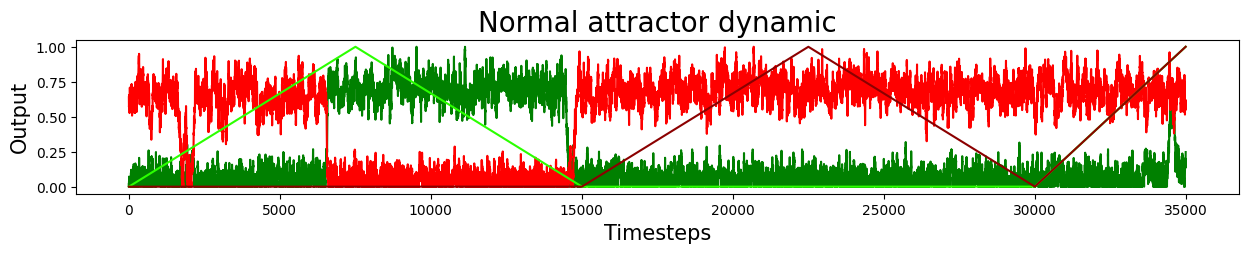

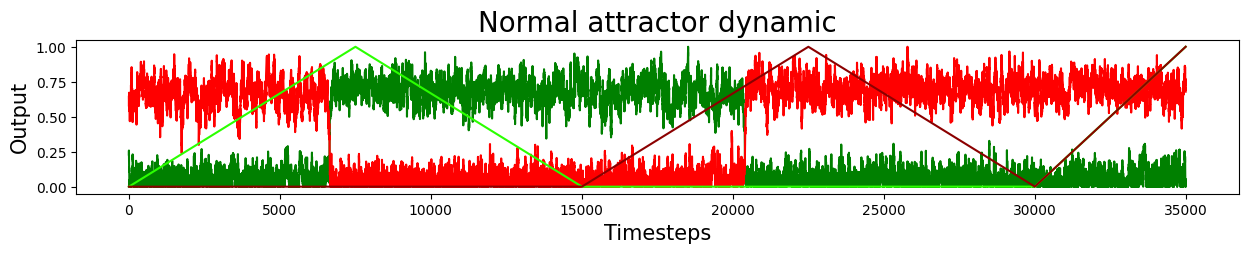

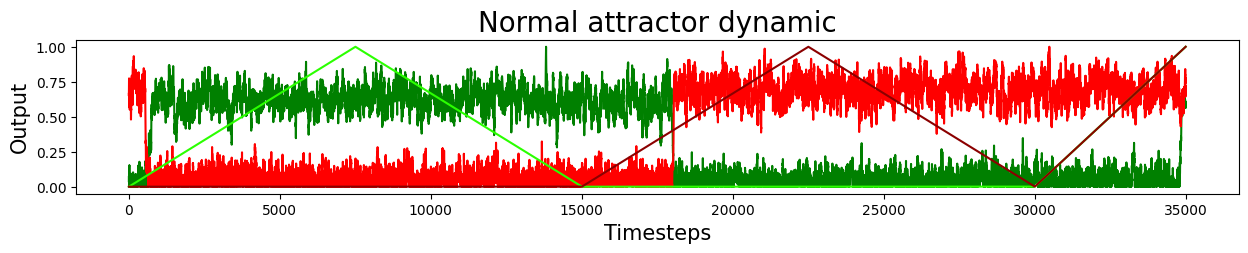

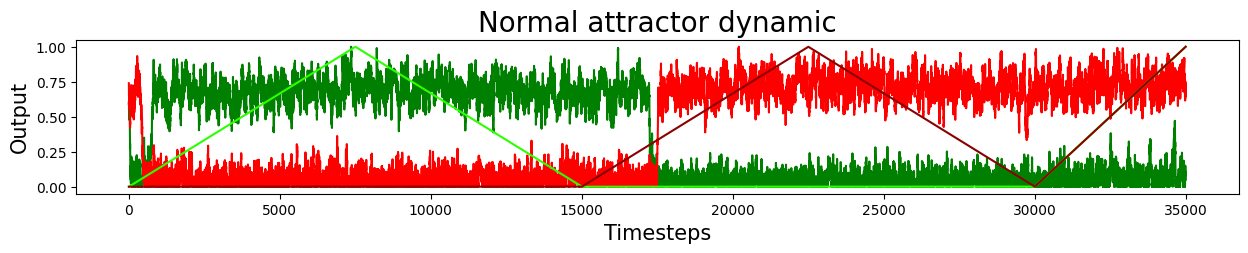

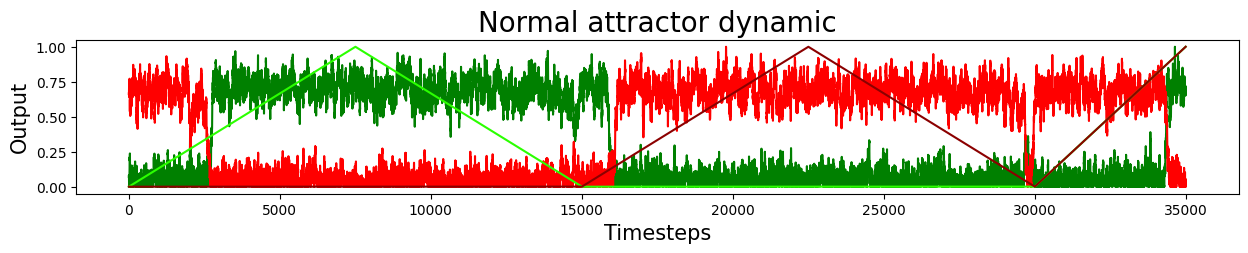

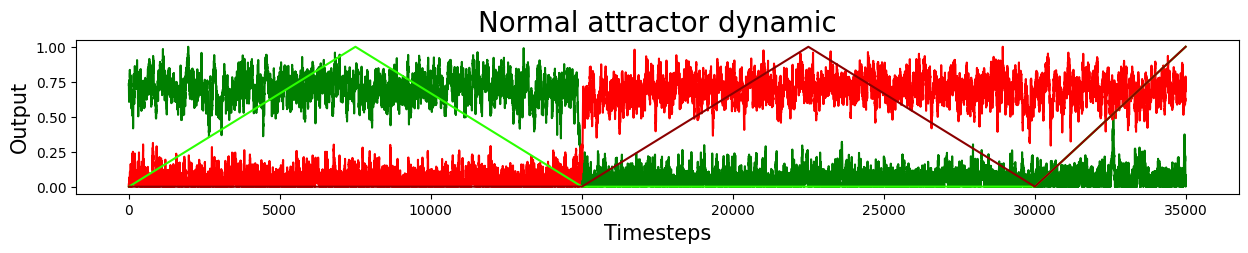

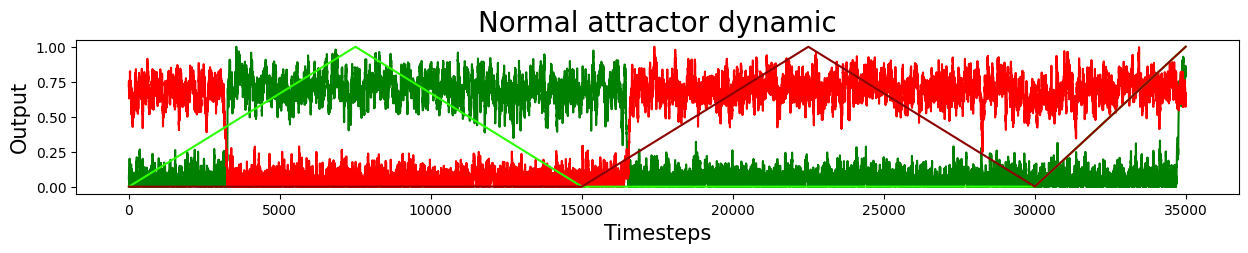

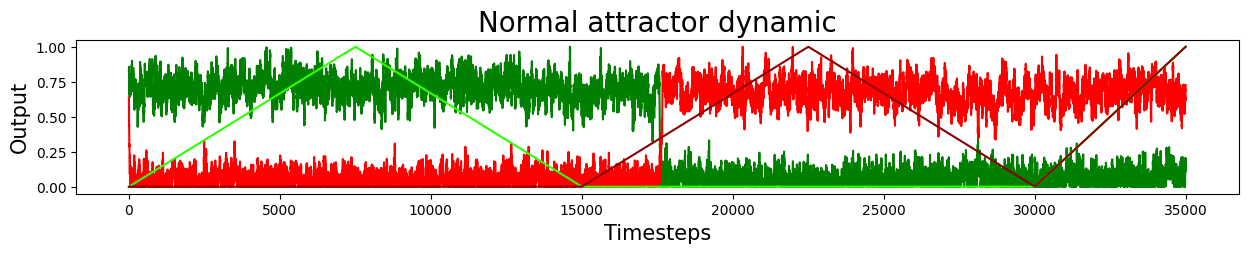

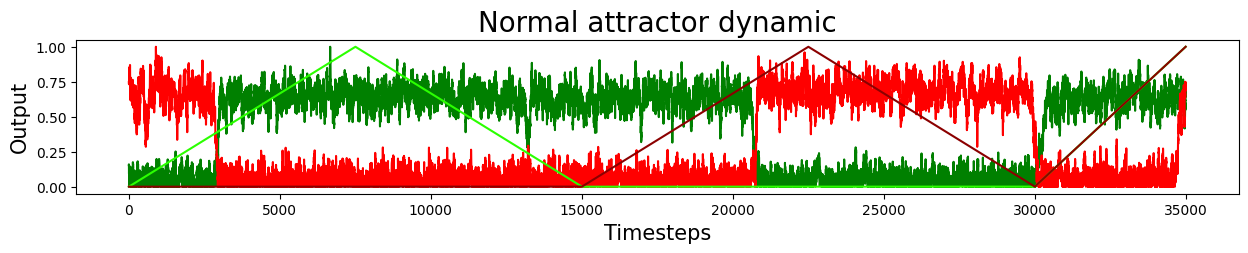

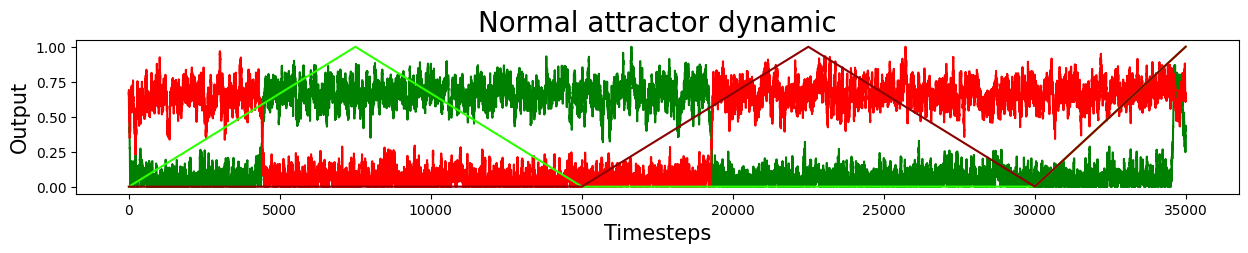

In [12]:
for i in range(int(len(rslt_df)/2)):
    plt.figure(figsize=(15, 2))
    plt.plot(output[i*2+1]/max(output[i*2+1]),'g')
    plt.plot(output[i*2]/max(output[i*2]),'r')
    plt.plot(np.array(sec_aV_list),'#2bff00')
    plt.plot(np.array(aro_aV_list),'darkred')
    plt.title('Normal attractor dynamic', fontsize=20)
    plt.ylabel('Output', fontsize=15)
    plt.xlabel('Timesteps', fontsize=15)
    plt.show()

## Mutual information

In [13]:
def mutual_info(distr):
    pS = np.sum(distr, axis=1)
    pR = np.sum(distr, axis=0)
    pSR = np.copy(distr)
    np.seterr(divide='ignore', invalid='ignore')
    I = np.sum(pSR * np.ma.log2(pSR / (pR[np.newaxis, :] * pS[:, np.newaxis])).filled(0))
    return I

In [14]:
# Max Mutual Information
input_bins = 10
output_bins = 10

max_distr = np.zeros((input_bins,output_bins))
max_distr[0,0] = 1
max_distr[1,1] = 1
max_distr[2,2] = 1
max_distr[3,3] = 1
max_distr[4,4] = 1
max_distr[5,5] = 1
max_distr[6,6] = 1
max_distr[7,7] = 1
max_distr[8,8] = 1
max_distr[9,9] = 1

max_distr /= max_distr.sum()

print("Max mutual information = " + str(mutual_info(max_distr)))

Max mutual information = 3.321928094887362


In [15]:
bined_input_sec = []
bin_size = .1

for i in range(len(sec_aV_list)):
    for j in range(input_bins):
        if sec_aV_list[i] >= bin_size * j and sec_aV_list[i] <= bin_size * (j+1):
            bined_input_sec.append(j)
            
print(len(bined_input_sec))

34997


In [16]:
bined_input_aro = []

for i in range(len(aro_aV_list)):
    for j in range(input_bins):
        if aro_aV_list[i] >= bin_size * j and aro_aV_list[i] <= bin_size * (j+1):
            bined_input_aro.append(j)
            
print(len(bined_input_aro))

34997


In [17]:
column_bin_in = []
column_in = []
rang = len(df['Normal'])
rang = int(rang/2)


for i in range(int(df.shape[0]/2)):
    column_bin_in.append(bined_input_aro)
    column_bin_in.append(bined_input_sec)
    column_in.append(aro_aV_list)
    column_in.append(sec_aV_list)
    

In [18]:
df['Bined_input'] = column_bin_in
df

Q  Var  Episode     Drive  \
0     0.0    0        0   Arousal   
1     0.0    0        0  Security   
2     0.0    0        1   Arousal   
3     0.0    0        1  Security   
4     0.0    0        2   Arousal   
...   ...  ...      ...       ...   
2415  1.0  100        7  Security   
2416  1.0  100        8   Arousal   
2417  1.0  100        8  Security   
2418  1.0  100        9   Arousal   
2419  1.0  100        9  Security   

                                                  Input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0.000133333333333, 0.000266666666666, 0.00039...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0.000133333333333, 0.000266666666666, 0.00039...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0.000133333333333, 0.000266666666666, 0.00039...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0.000133333333333, 0.000266666666666, 0.00039...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  \
0     [0.08422348254027834, 0.16477823495339894, 0.2...   
1     [0.08425282440189262, 0.16486570617211838, 0.2...   
2     [1.4906671113846215, 1.4214808605617493, 1.355...   
3     [39.728950766367056, 39.62452215951652, 39.523...   
4     [1.4906671113846215, 1.4214808605617493, 1.355...   
...                                                 ...   
2415  [8.315394873130128, 4.38705393366105, 11.92597...   
2416  [44.47456426089253, 44.95645516996734, 39.6823...   
2417  [61.70399159554175, 63.213260922044086, 59.334...   
2418  [-0.0, 7.72251033747894, 15.638085907941372, 9...   
2419  [35.97295829577929, 27.335425147457215, 26.568...   

                                                 Normal  \
0     [0.035093333694980945, 0.06865802042944699, 0....   
1     [0.0021141375002194708, 0.004136938724523169, ...   
2     [0.6211151188498572, 0.5922873369296479, 0.564...   
3     [0.996909780245455, 0.9942893762957279, 0.9917...   
4     [0.6211151188498572, 0.5922873369296479, 0.564...   
...                                                 ...   
2415  [0.08565969860128714, 0.04519252824893669, 0.1...   
2416  [0.4386078349023635, 0.44336023960381415, 0.39...   
2417  [0.6250736854163771, 0.6403628833403389, 0.601...   
2418  [-0.0, 0.07991070879554668, 0.1618192109170036...   
2419  [0.34618855023102846, 0.2630645810093781, 0.25...   

                                            Bined_input  
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
2415  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2417  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2419  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[2420 rows x 8 columns]

In [19]:
len(df['Input'][300])

34999

In [20]:
bined_output = []
column_bin_out = []

for i in tqdm(range(len(df['Normal']))):
    for j in range(len(df['Normal'][i])):
        for k in range(output_bins):
            if df['Normal'][i][j]>= bin_size * k and df['Normal'][i][j] <= bin_size * (k+1):
                bined_output.append(k)
    column_bin_out.append(bined_output)
    bined_output = []

100%|██████████| 2420/2420 [3:21:25<00:00,  4.99s/it]  


In [21]:
df['Bined_output'] = column_bin_out

In [38]:
df

Q  Var  Episode     Drive  \
0     0.0    0        0   Arousal   
1     0.0    0        0  Security   
2     0.0    0        1   Arousal   
3     0.0    0        1  Security   
4     0.0    0        2   Arousal   
...   ...  ...      ...       ...   
2415  1.0  100        7  Security   
2416  1.0  100        8   Arousal   
2417  1.0  100        8  Security   
2418  1.0  100        9   Arousal   
2419  1.0  100        9  Security   

                                                  Input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0.000133333333333, 0.000266666666666, 0.00039...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0.000133333333333, 0.000266666666666, 0.00039...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0.000133333333333, 0.000266666666666, 0.00039...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0.000133333333333, 0.000266666666666, 0.00039...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  \
0     [0.08422348254027834, 0.16477823495339894, 0.2...   
1     [0.08425282440189262, 0.16486570617211838, 0.2...   
2     [1.4906671113846215, 1.4214808605617493, 1.355...   
3     [39.728950766367056, 39.62452215951652, 39.523...   
4     [1.4906671113846215, 1.4214808605617493, 1.355...   
...                                                 ...   
2415  [8.315394873130128, 4.38705393366105, 11.92597...   
2416  [44.47456426089253, 44.95645516996734, 39.6823...   
2417  [61.70399159554175, 63.213260922044086, 59.334...   
2418  [-0.0, 7.72251033747894, 15.638085907941372, 9...   
2419  [35.97295829577929, 27.335425147457215, 26.568...   

                                                 Normal  \
0     [0.035093333694980945, 0.06865802042944699, 0....   
1     [0.0021141375002194708, 0.004136938724523169, ...   
2     [0.6211151188498572, 0.5922873369296479, 0.564...   
3     [0.996909780245455, 0.9942893762957279, 0.9917...   
4     [0.6211151188498572, 0.5922873369296479, 0.564...   
...                                                 ...   
2415  [0.08565969860128714, 0.04519252824893669, 0.1...   
2416  [0.4386078349023635, 0.44336023960381415, 0.39...   
2417  [0.6250736854163771, 0.6403628833403389, 0.601...   
2418  [-0.0, 0.07991070879554668, 0.1618192109170036...   
2419  [0.34618855023102846, 0.2630645810093781, 0.25...   

                                            Bined_input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           Bined_output  
0     [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, ...  
3     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...  
4     [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, ...  
...                                                 ...  
2415  [0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, ...  
2416  [4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, ...  
2417  [6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...  
2418  [0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, ...  
2419  [3, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[2420 rows x 9 columns]

In [29]:
file_path = '/home/roboticslab/Robotology/Repos/allostractor/data/input_test/dataframe.csv'

In [30]:
df.to_csv(file_path)

In [31]:
df2 = pd.read_csv(file_path)

In [36]:
df2

Unnamed: 0    Q  Var  Episode     Drive  \
0              0  0.0    0        0   Arousal   
1              1  0.0    0        0  Security   
2              2  0.0    0        1   Arousal   
3              3  0.0    0        1  Security   
4              4  0.0    0        2   Arousal   
...          ...  ...  ...      ...       ...   
2415        2415  1.0  100        7  Security   
2416        2416  1.0  100        8   Arousal   
2417        2417  1.0  100        8  Security   
2418        2418  1.0  100        9   Arousal   
2419        2419  1.0  100        9  Security   

                                                  Input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0.000133333333333, 0.000266666666666, 0.00039...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0.000133333333333, 0.000266666666666, 0.00039...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0.000133333333333, 0.000266666666666, 0.00039...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0.000133333333333, 0.000266666666666, 0.00039...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0.000133333333333, 0.000266666666666, 0.00039...   

                                                 Output  \
0     [0.08422348254027834, 0.16477823495339894, 0.2...   
1     [0.08425282440189262, 0.16486570617211838, 0.2...   
2     [1.4906671113846215, 1.4214808605617493, 1.355...   
3     [39.728950766367056, 39.62452215951652, 39.523...   
4     [1.4906671113846215, 1.4214808605617493, 1.355...   
...                                                 ...   
2415  [8.315394873130128, 4.38705393366105, 11.92597...   
2416  [44.47456426089253, 44.95645516996734, 39.6823...   
2417  [61.70399159554175, 63.213260922044086, 59.334...   
2418  [-0.0, 7.72251033747894, 15.638085907941372, 9...   
2419  [35.97295829577929, 27.335425147457215, 26.568...   

                                                 Normal  \
0     [0.03509333 0.06865802 0.10076089 ... 0.650546...   
1     [0.00211414 0.00413694 0.00607241 ... 0.999624...   
2     [0.62111512 0.59228734 0.56488887 ... 0.650546...   
3     [0.99690978 0.99428938 0.9917633  ... 0.999624...   
4     [0.62111512 0.59228734 0.56488887 ... 0.650546...   
...                                                 ...   
2415  [0.0856597  0.04519253 0.12285352 ... 0.479193...   
2416  [0.43860783 0.44336024 0.39134671 ... 0.014506...   
2417  [0.62507369 0.64036288 0.60107259 ... 0.492002...   
2418  [-0.          0.07991071  0.16181921 ...  0.27...   
2419  [0.34618855 0.26306458 0.25568481 ... 0.606059...   

                                            Bined_input  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2415  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2416  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2417  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2418  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2419  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           Bined_output  
0     [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, ...  
3     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...  
4     [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, ...  
...                                                 ...  
2415  [0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, ...  
2416  [4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, ...  
2417  [6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...  
2

In [33]:
print(len(df['Input'][0]))
print(len(df2['Input'][0]))

34999
450307
